### Importación de datos



In [ ]:
# 📦 Importación de datos
import pandas as pd
import matplotlib.pyplot as plt

# URLs de los archivos CSV
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Lectura de los datos
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)



#1. Análisis de facturación



In [ ]:
# Calcular la facturación total por tienda
facturaciones = [
    tienda1["Precio"].sum(),
    tienda2["Precio"].sum(),
    tienda3["Precio"].sum(),
    tienda4["Precio"].sum()
]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

In [ ]:
# Imprimir resultados en formato de tabla
print("📊 FACTURACIÓN POR TIENDA")
print("-"*40)
for nombre, facturacion in zip(nombres_tiendas, facturaciones):
    print(f"{nombre}: ${facturacion:,.2f}")  # Formato con separadores de miles y 2 decimales
print("-"*40)
print(f"TOTAL GENERAL: ${sum(facturaciones):,.2f}")
print("\n")  # Espacio adicional

📊 FACTURACIÓN POR TIENDA
----------------------------------------
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00
----------------------------------------
TOTAL GENERAL: $4,403,619,200.00




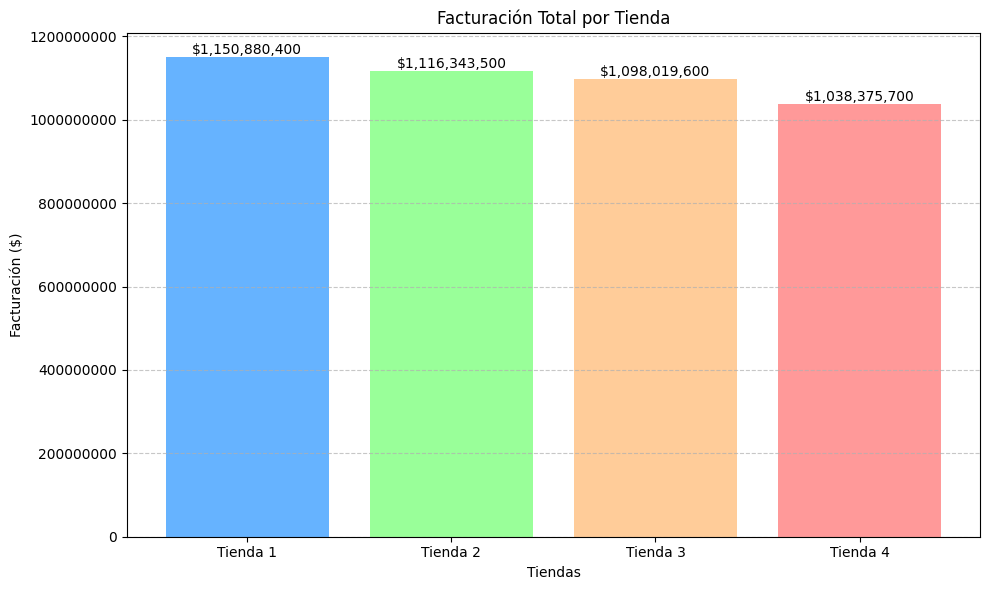

In [ ]:
# Gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(nombres_tiendas, facturaciones, color=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999'])
plt.title('Facturación Total por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Facturación ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='y')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10000, f"${height:,.0f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

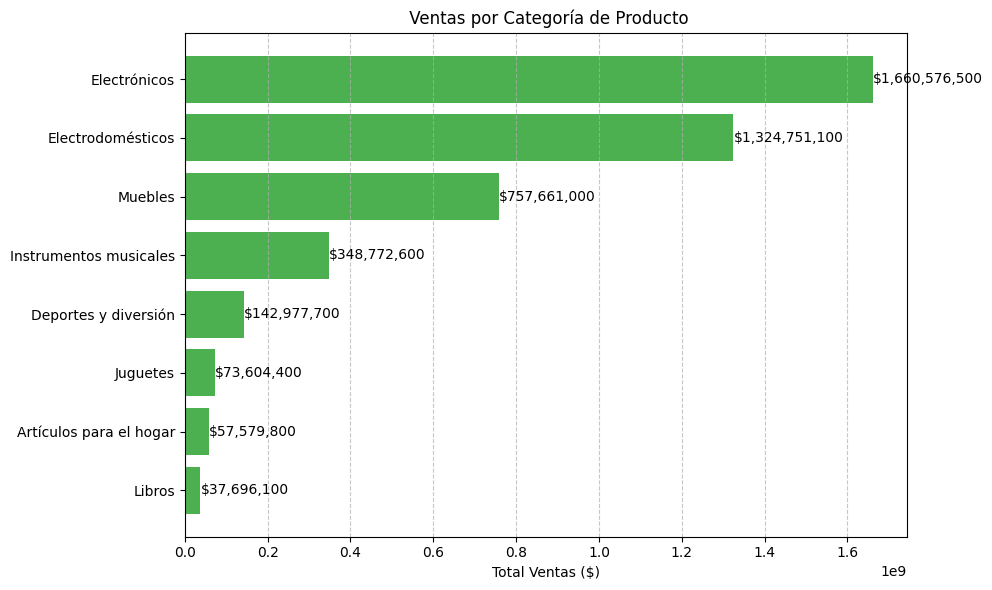

In [ ]:
# Unir todos los DataFrames
df_total = pd.concat([tienda1, tienda2, tienda3, tienda4])

ventas_por_categoria = df_total.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=True)

# Gráfico horizontal
plt.figure(figsize=(10, 6))
plt.barh(ventas_por_categoria.index, ventas_por_categoria.values, color='#4CAF50')
plt.title(" Ventas por Categoría de Producto")
plt.xlabel("Total Ventas ($)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(ventas_por_categoria.values):
    plt.text(value + 2000, index, f"${value:,.0f}", va='center')
plt.tight_layout()
plt.show()

In [ ]:
# Imprimir resultados
print("🛒 VENTAS POR CATEGORÍA")
print("-"*45)
for categoria, ventas in ventas_por_categoria.items():
    print(f"{categoria:<20} ${ventas:>12,.2f}")  # Alineación izquierda-derecha
print("-"*45)
print(f"TOTAL {' '*15} ${ventas_por_categoria.sum():>12,.2f}")
print("\n")

🛒 VENTAS POR CATEGORÍA
---------------------------------------------
Libros               $37,696,100.00
Artículos para el hogar $57,579,800.00
Juguetes             $73,604,400.00
Deportes y diversión $142,977,700.00
Instrumentos musicales $348,772,600.00
Muebles              $757,661,000.00
Electrodomésticos    $1,324,751,100.00
Electrónicos         $1,660,576,500.00
---------------------------------------------
TOTAL                 $4,403,619,200.00




# 3. Calificación promedio de la tienda


In [ ]:
# Calificaciones promedio
calificaciones = [
    tienda1["Calificación"].mean(),
    tienda2["Calificación"].mean(),
    tienda3["Calificación"].mean(),
    tienda4["Calificación"].mean()
]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']



In [ ]:
print("⭐ CALIFICACIONES PROMEDIO POR TIENDA ⭐")
print("-"*50)
for tienda, calif in zip(tiendas, calificaciones):
    print(f"{tienda:<10} {calif:.2f}/5 {'★'*int(round(calif))}")  # Añade estrellas visuales
print("-"*50)

⭐ CALIFICACIONES PROMEDIO POR TIENDA ⭐
--------------------------------------------------
Tienda 1   3.98/5 ★★★★
Tienda 2   4.04/5 ★★★★
Tienda 3   4.05/5 ★★★★
Tienda 4   4.00/5 ★★★★
--------------------------------------------------


<ipython-input-6-86288672b9a3>:11: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


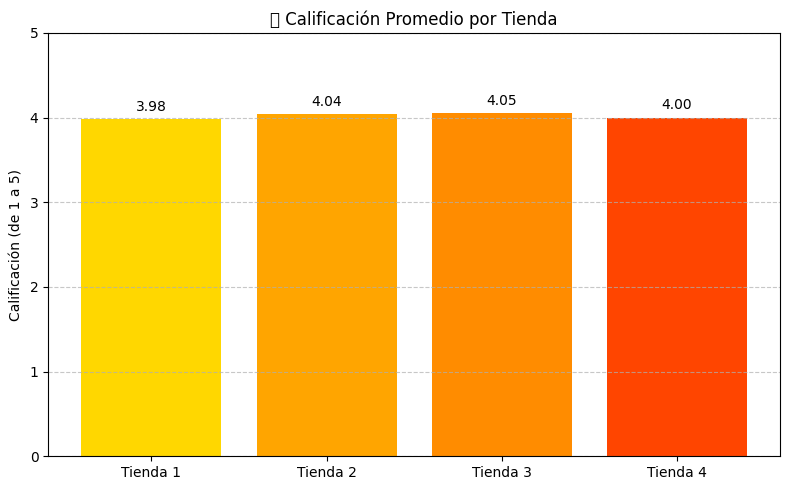

In [ ]:
# Gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(tiendas, calificaciones, color=['#FFD700', '#FFA500', '#FF8C00', '#FF4500'])
plt.title("⭐ Calificación Promedio por Tienda")
plt.ylabel("Calificación (de 1 a 5)")
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f"{height:.2f}", ha='center')
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

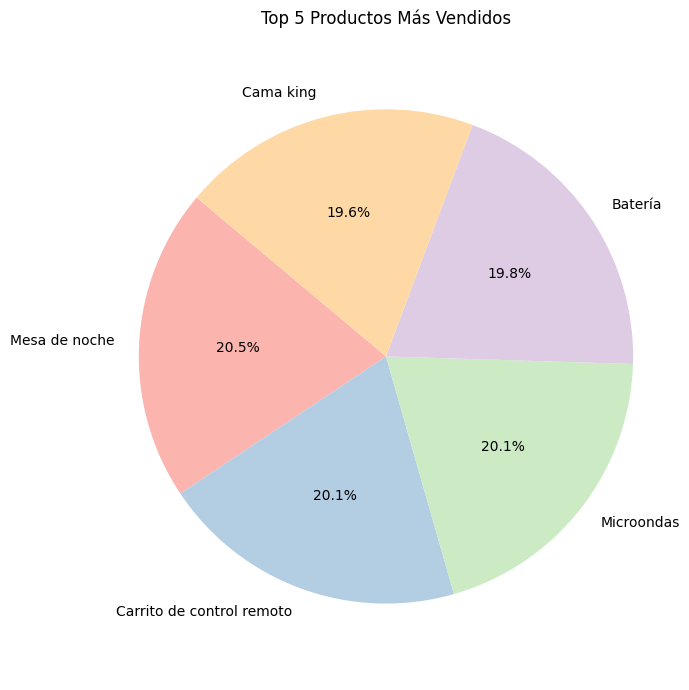

In [ ]:
# Productos más vendidos
top_productos = df_total["Producto"].value_counts().head(5)

plt.figure(figsize=(7,7))
plt.pie(top_productos.values, labels=top_productos.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("Top 5 Productos Más Vendidos")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
print("🚀 TOP 5 PRODUCTOS MÁS VENDIDOS")
print("-"*50)
for i, (producto, cantidad) in enumerate(top_productos.items(), 1):
    print(f"{i}. {producto:<25} {cantidad:>4} unidades | {'▮'*int(cantidad/max(top_productos)*20)}")
print("-"*50)
print(f"Total representado: {top_productos.sum()/len(df_total)*100:.1f}% del total de ventas")

🚀 TOP 5 PRODUCTOS MÁS VENDIDOS
--------------------------------------------------
1. Mesa de noche              210 unidades | ▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮
2. Carrito de control remoto  206 unidades | ▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮
3. Microondas                 206 unidades | ▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮
4. Batería                    203 unidades | ▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮
5. Cama king                  201 unidades | ▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮▮
--------------------------------------------------
Total representado: 10.9% del total de ventas


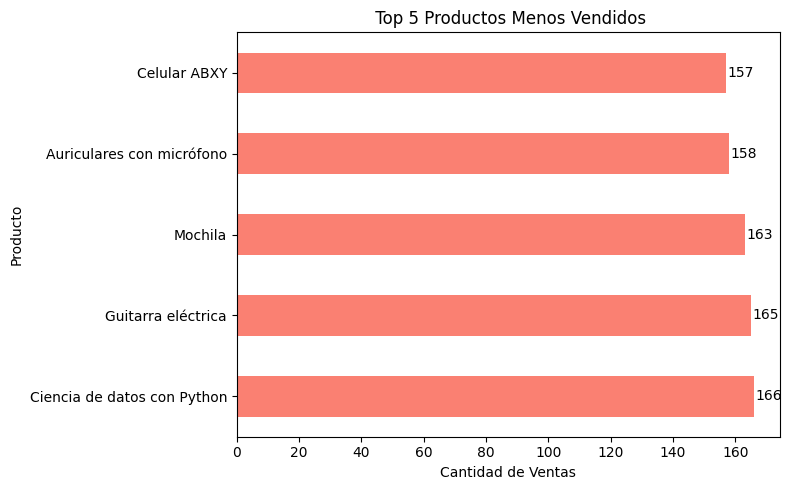

In [ ]:
# Productos menos vendidos
productos_menos_vendidos = df_total["Producto"].value_counts().tail(5)

plt.figure(figsize=(8,5))
productos_menos_vendidos.plot(kind='barh', color='salmon')
plt.title(" Top 5 Productos Menos Vendidos")
plt.xlabel("Cantidad de Ventas")
plt.ylabel("Producto")
for index, value in enumerate(productos_menos_vendidos.values):
    plt.text(value + 0.5, index, str(value), va='center')
plt.tight_layout()
plt.show()

In [ ]:
print("📉 TOP 5 PRODUCTOS MENOS VENDIDOS")
print("-"*55)
for i, (producto, cantidad) in enumerate(productos_menos_vendidos.items(), 1):
    dif_media = cantidad - df_total["Producto"].value_counts().mean()
    print(f"{i}. {producto:<30} {cantidad:>3} unidades | {dif_media:+.0f} vs promedio")
print("-"*55)
print(f"Representan solo el {productos_menos_vendidos.sum()/len(df_total)*100:.1f}% del total")

📉 TOP 5 PRODUCTOS MENOS VENDIDOS
-------------------------------------------------------
1. Ciencia de datos con Python    166 unidades | -19 vs promedio
2. Guitarra eléctrica             165 unidades | -20 vs promedio
3. Mochila                        163 unidades | -22 vs promedio
4. Auriculares con micrófono      158 unidades | -27 vs promedio
5. Celular ABXY                   157 unidades | -28 vs promedio
-------------------------------------------------------
Representan solo el 8.6% del total


# 5. Envío promedio por tienda

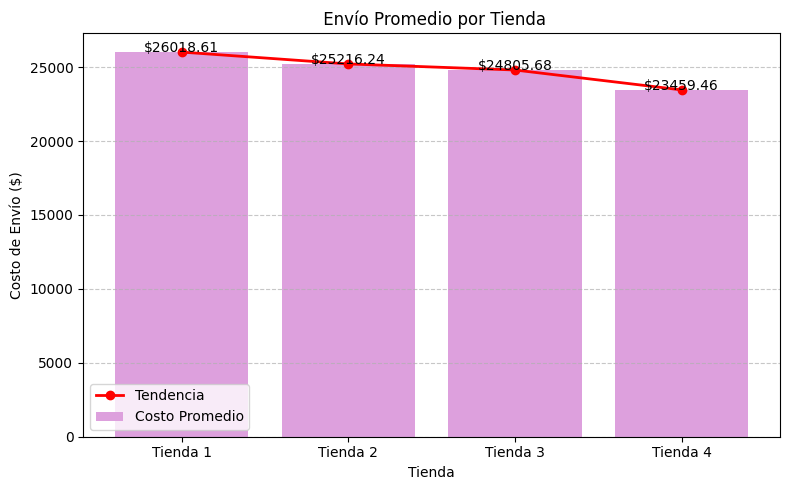

In [ ]:
# Costo de envío promedio por tienda
envio_promedio = [
    tienda1["Costo de envío"].mean(),
    tienda2["Costo de envío"].mean(),
    tienda3["Costo de envío"].mean(),
    tienda4["Costo de envío"].mean()
]

plt.figure(figsize=(8,5))
plt.bar(tiendas, envio_promedio, color='plum', label='Costo Promedio')
plt.plot(tiendas, envio_promedio, color='red', marker='o', linewidth=2, label='Tendencia')
plt.title(" Envío Promedio por Tienda")
plt.ylabel("Costo de Envío ($)")
plt.xlabel("Tienda")
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, valor in enumerate(envio_promedio):
    plt.text(i, valor + 1, f"${valor:.2f}", ha='center')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

promedio_general = np.mean(envio_promedio)
print("🚚 COSTO PROMEDIO DE ENVÍO POR TIENDA")
print("-"*60)
for tienda, costo in zip(tiendas, envio_promedio):
    variacion = (costo - promedio_general)/promedio_general*100
    print(f"{tienda:<10} ${costo:.2f} ({variacion:+.1f}% vs promedio) | {'⬆' if costo > promedio_general else '⬇'} {abs(variacion):.1f}%")
print("-"*60)
print(f"Promedio general: ${promedio_general:.2f}")

🚚 COSTO PROMEDIO DE ENVÍO POR TIENDA
------------------------------------------------------------
Tienda 1   $26018.61 (+4.6% vs promedio) | ⬆ 4.6%
Tienda 2   $25216.24 (+1.4% vs promedio) | ⬆ 1.4%
Tienda 3   $24805.68 (-0.3% vs promedio) | ⬇ 0.3%
Tienda 4   $23459.46 (-5.7% vs promedio) | ⬇ 5.7%
------------------------------------------------------------
Promedio general: $24875.00


In [ ]:
# Agrupar datos por coordenadas
df_geo = df_total.groupby(['lat', 'lon']).agg({
    'Precio': 'sum',
    'Calificación': 'mean',
    'Producto': 'count'
}).reset_index()

# Renombrar para claridad
df_geo.rename(columns={
    'Precio': 'total_sales',
    'Calificación': 'avg_review',
    'Producto': 'sales_count'
}, inplace=True)

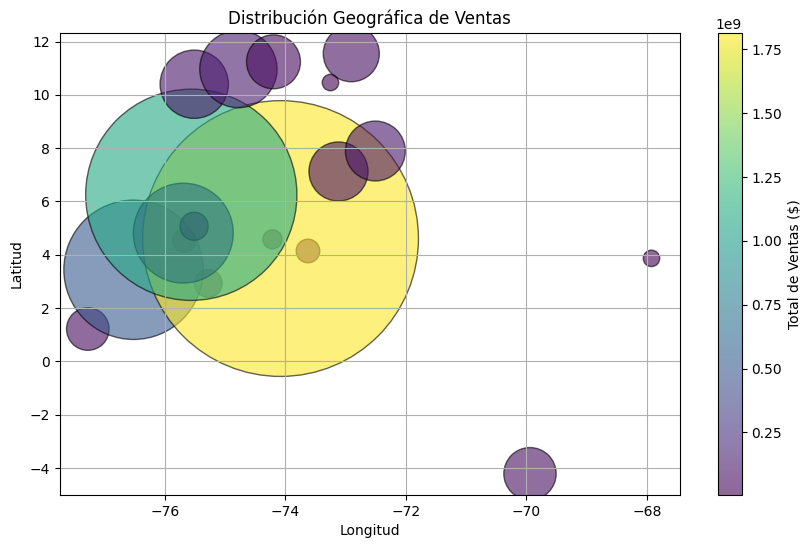

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_geo['lon'], df_geo['lat'],
    c=df_geo['total_sales'],
    s=df_geo['sales_count'] * 10,
    cmap='viridis', alpha=0.6, edgecolors='k'
)

plt.colorbar(scatter, label='Total de Ventas ($)')
plt.title('Distribución Geográfica de Ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()

In [ ]:
# En este punto decidí realizar un mapa interactivo, con el fin de que se pueda visualizar a escala las ventas.

import folium
from folium.plugins import HeatMap

# Crear mapa centrado
m = folium.Map(location=[df_geo['lat'].mean(), df_geo['lon'].mean()], zoom_start=6)

# Heatmap de ingresos
heat_data = [[row['lat'], row['lon'], row['total_sales']] for index, row in df_geo.iterrows()]
HeatMap(heat_data, radius=15).add_to(m)